In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_blobs, make_moons, make_circles, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
     

In [36]:
df = pd.read_csv('mobile_price.csv')

In [37]:
X = df.drop('price_range', axis=1)  
y = df['price_range'] 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
svm_model = SVC(kernel='rbf', C=10, gamma='scale') 
svm_model.fit(X_train_scaled, y_train)

SVC(C=10)

In [41]:
y_pred = svm_model.predict(X_test_scaled)

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       105
           1       0.80      0.86      0.83        91
           2       0.87      0.83      0.85        92
           3       0.97      0.96      0.97       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



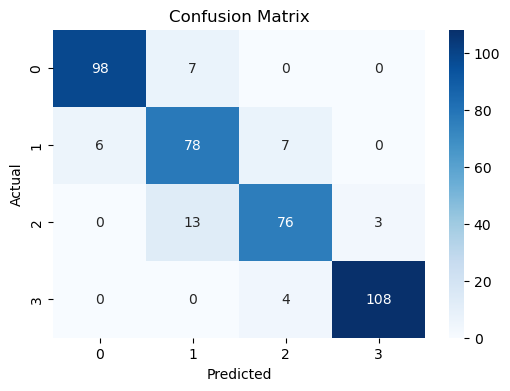

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()